In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
df=yf.download('^GSPC',start='2023-01-01',end='2023-04-28')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
...,...,...,...,...,...,...
2023-04-21,4132.140137,4138.020020,4113.859863,4133.520020,4133.520020,3611750000
2023-04-24,4132.069824,4142.410156,4117.770020,4137.040039,4137.040039,3290940000
2023-04-25,4126.430176,4126.430176,4071.379883,4071.629883,4071.629883,3978640000


In [3]:
support=df[df.Low==df.Low.rolling(5,center=True).min()].Low
resistance=df[df.High==df.High.rolling(5,center=True).max()].High

In [4]:
support

Date
2023-01-19    3885.540039
2023-01-25    3949.060059
2023-02-10    4060.790039
2023-02-24    3943.080078
2023-03-02    3928.159912
2023-03-13    3808.860107
2023-03-24    3909.159912
2023-04-06    4069.840088
Name: Low, dtype: float64

In [5]:
resistance

Date
2023-01-17    4015.389893
2023-01-23    4039.310059
2023-01-27    4094.209961
2023-02-02    4195.439941
2023-02-14    4159.770020
2023-03-06    4078.489990
2023-03-16    3964.459961
2023-03-22    4039.489990
2023-04-04    4133.129883
2023-04-18    4169.479980
Name: High, dtype: float64

In [6]:
levels=pd.concat([support,resistance])
levels

Date
2023-01-19    3885.540039
2023-01-25    3949.060059
2023-02-10    4060.790039
2023-02-24    3943.080078
2023-03-02    3928.159912
2023-03-13    3808.860107
2023-03-24    3909.159912
2023-04-06    4069.840088
2023-01-17    4015.389893
2023-01-23    4039.310059
2023-01-27    4094.209961
2023-02-02    4195.439941
2023-02-14    4159.770020
2023-03-06    4078.489990
2023-03-16    3964.459961
2023-03-22    4039.489990
2023-04-04    4133.129883
2023-04-18    4169.479980
dtype: float64

In [7]:
levels=levels[abs(levels.diff())>100]
levels

Date
2023-02-10    4060.790039
2023-02-24    3943.080078
2023-03-13    3808.860107
2023-03-24    3909.159912
2023-04-06    4069.840088
2023-02-02    4195.439941
2023-03-16    3964.459961
dtype: float64

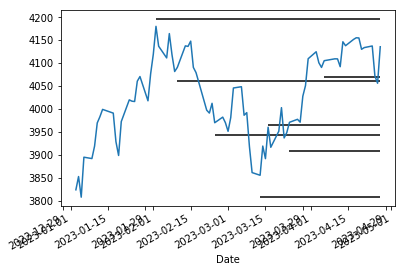

In [8]:
df.Close.plot()
plt.hlines(levels,xmin=levels.index,xmax=df.index[-1])